## Aim 
### to count the total grain of rice present in the image.
### to classify the grains according to various types

### Importing necesssary libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import subplots

pd.set_option('display.max_columns', None)

import cv2
import PIL.Image as image

import dash
import dash_core_components as dcc
import dash_html_components as html


import plotly.express as px
from dash.dependencies import Input, Output, State

from io import BytesIO
import base64
app = dash.Dash(__name__)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_12420\2672669476.py:14: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Pranav\AppData\Local\Temp\ipykernel_12420\2672669476.py:15: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
#!pip install dash

#### We need to classify the rice particle according to their types, i.e.  slender, medium, bold, round, dust.
#### This can be done by alloting the size of the ratio

In [3]:
# classification of rice particles

def get_classification(ratio):
    ratio = round(ratio,1)
    toret=""
    if(ratio>=3 and ratio<3.5):
        toret="Slender"
    elif(ratio>=2.1 and ratio<3):
        toret="Medium"
    elif(ratio>=1.1 and ratio<2.1):
        toret="Bold"
    elif(ratio>=0.9 and ratio<=1):
        toret="Round"
    else:
        toret="Dust"
    return toret 

In [4]:
# initialising the values
classification = {"Slender":0,"Medium":0,"Bold":0,"Round":0,"Dust":0}
avg = {"Slender":0,"Medium":0,"Bold":0,"Round":0,"Dust":0}

Now we need to read the image by alloting the path of the image.

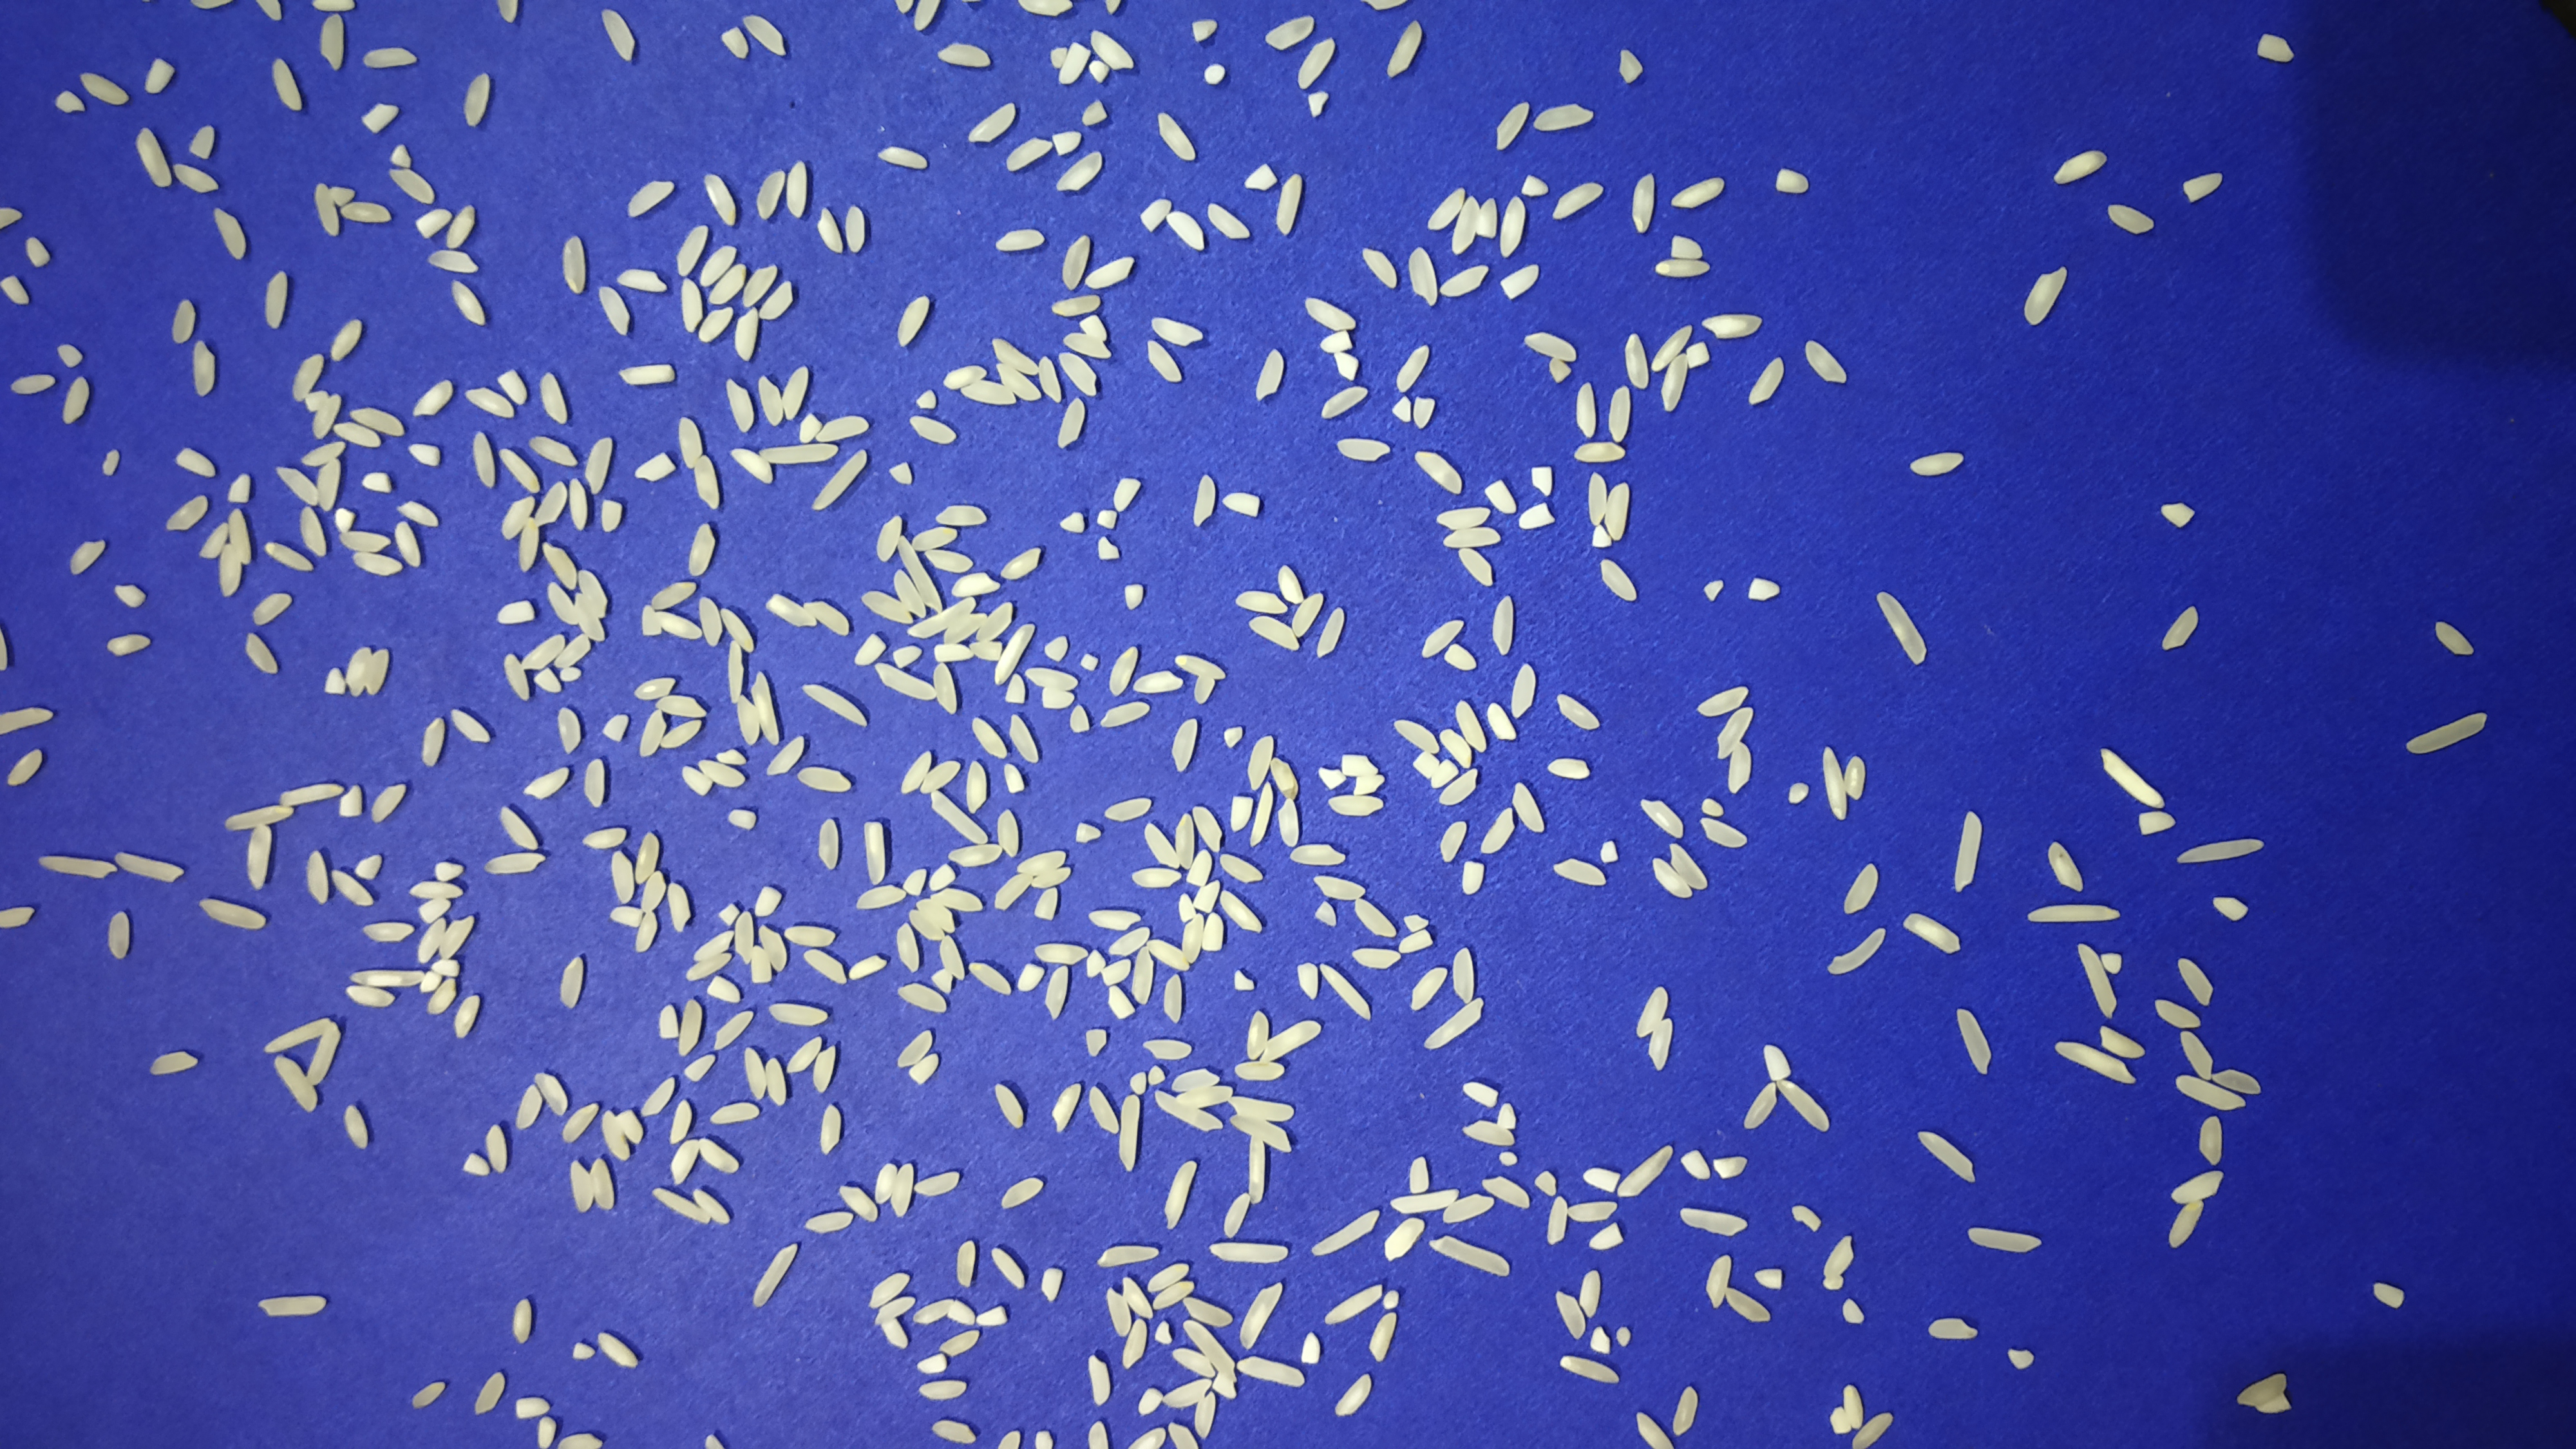

In [5]:
from IPython.display import display, Image
img =cv2.imread("D:/rice grain classification/test/image_1.jpg",0)
display(Image(filename="D:/rice grain classification/test/image_1.jpg"))

Generating a histogram to visualise the distribution.

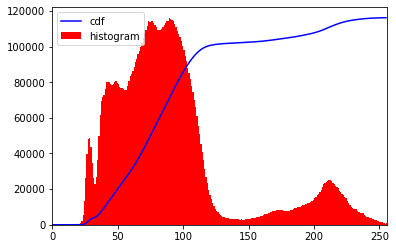

In [6]:
## histogram part of image

img = cv2.imread("D:/rice grain classification/test/image_1.jpg",0)
hist, bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
#plt.show()

In [7]:
# convert to binary
# 160 - threhold, 255 - value to assign, thresh_binary_inv - Inverse binary
ret, binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

In [8]:
# avg filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)
# -1: Depth of the destination image
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))


In [9]:
# erosion
erosion = cv2.erode(dst, kernel2, iterations =1)


In [10]:
# dilation
dilation = cv2.dilate(erosion, kernel2, iterations =1)

In [11]:
# edge detection 
edges = cv2.Canny(dilation,100,200)


### Now we need to print the number of rice grains detected.

In [12]:
# size detection 
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=", len(contours))
total_ar=0

No. of rice grains= 423


In [13]:
# counting impurities
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if (aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar +=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio

In [14]:
avg_ar = total_ar/len(contours)

In [15]:
# setting the values for classification of rice

if classification['Slender']!=0:
    avg['Slender'] = avg['Slender']/classification['Slender']
if classification['Medium']!=0:
    avg['Medium'] = avg['Medium']/classification['Medium']
if classification['Bold']!=0:
    avg['Bold'] = avg['Bold']/classification['Bold']
if classification['Round']!=0:
    avg['Round'] = avg['Round']/classification['Round']    

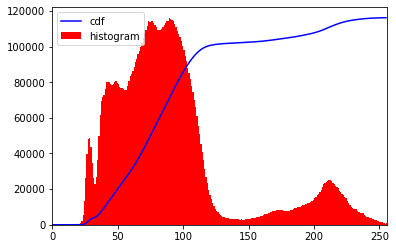

In [16]:
## histogram part of image

img = cv2.imread("D:/rice grain classification/test/image_1.jpg",0)
hist, bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
#plt.show()

In [17]:
# converting rgb to bgr

def readb64(base_string):
    sbuf = BytesIO()
    sbuf.write(base64.b64.decode(base64_string))
    pimg= image.open(sbuf)
    return cv2.cvtColor(np.array(pimg),cv2.COLOR_RGB2BGR)

In [18]:
# updating the image
def update_image(pic):
    img = readb64(pic)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    classification1 = {"Slender":0,"Medium":0,"Bold":0,"Round":0,"Dust":0}
    avg1 = {"Slender":0,"Medium":0,"Bold":0,"Round":0,"Dust":0}
    
    # convert into binary
    ret, binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)
    
    #averaging filter
    kernel = np.ones((5,5),np.float32)/9
    dst = cv2.filter2D(binary,-1,kerel)
    
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    
    # erosion
    erosion = cv2.erode(dst,kernel2,iterations = 1)
    
    #dilation
    dilation = cv2.dilate(erosion, kernel2, iterations=1)
    
    #edges
    edges = cv2.Canny(dilation,100,200)
    
    contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # print no.of rice grains
    
    total_ar1=0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        if(aspect_ratio<1):
            aspect_ratio=1/aspect_ratio
        print(round(aspect_ratio,2),get_classification(aspect_ratio))
        classification1[get_classification(aspect_ratio)] += 1
        if get_classification(aspect_ratio) != "Dust":
            total_ar1+=aspect_ratio
        if get_classification(aspect_ratio) != "Dust":
            avg1[get_classification(aspect_ratio)] += aspect_ratio
    avg_ar1=total_ar1/len(contours)        
    if classification['Slender']!=0:
        avg['Slender'] = avg['Slender']/classification['Slender']
    if classification['Medium']!=0:
        avg['Medium'] = avg['Medium']/classification['Medium']
    if classification['Bold']!=0:
        avg['Bold'] = avg['Bold']/classification['Bold']
    if classification['Round']!=0:
        avg['Round'] = avg['Round']/classification['Round']    
        

    return classification1, avg1, avg_ar1

In [19]:
# size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("Total no. of grains is")
print(len(contours))
total_ar = 0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if (aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    print(round(aspect_ratio,2),get_classification(aspect_ratio))
    total_ar+=aspect_ratio
avg_ar= total_ar/len(contours)
print("Average aspect_ratio=", round(avg_ar,2), get_classification(avg_ar) )

Total no. of grains is
423
7.0 Dust
4.08 Dust
4.4 Dust
3.94 Dust
1.33 Bold
1.14 Bold
3.44 Slender
1.2 Bold
1.62 Bold
1.2 Bold
1.12 Bold
1.43 Bold
1.06 Bold
1.17 Bold
1.42 Bold
1.59 Bold
1.14 Bold
2.59 Medium
2.16 Medium
2.42 Medium
1.57 Bold
1.43 Bold
1.17 Bold
1.05 Round
1.06 Bold
1.38 Bold
1.33 Bold
1.0 Round
1.0 Round
1.59 Bold
2.0 Bold
1.9 Bold
1.3 Bold
1.25 Bold
2.11 Medium
1.0 Round
1.17 Bold
2.21 Medium
1.22 Bold
1.21 Bold
1.2 Bold
1.45 Bold
1.36 Bold
1.25 Bold
2.17 Medium
1.89 Bold
1.51 Bold
1.71 Bold
1.21 Bold
1.18 Bold
1.49 Bold
1.42 Bold
1.27 Bold
1.41 Bold
1.35 Bold
1.78 Bold
1.4 Bold
1.26 Bold
1.43 Bold
1.15 Bold
1.16 Bold
2.57 Medium
1.65 Bold
2.57 Medium
1.62 Bold
1.36 Bold
2.43 Medium
1.22 Bold
1.2 Bold
1.23 Bold
2.26 Medium
2.32 Medium
1.73 Bold
1.05 Round
2.38 Medium
1.61 Bold
1.34 Bold
1.39 Bold
1.33 Bold
1.17 Bold
1.51 Bold
2.0 Bold
2.14 Medium
2.54 Medium
1.11 Bold
1.02 Round
1.36 Bold
2.26 Medium
1.0 Round
1.33 Bold
1.38 Bold
2.81 Medium
3.36 Slender
1.58 Bold
2.5

#### Based on the classificaton, the aspect ratio for each grain is printed.
#### we have found that there a total of 423 grain of rice in the image